In [1]:
using PotentialFlow
using Plots
pyplot()
using Interact

clibrary(:colorbrewer);
streamline_colors = cgrad([:black, :black]);
default(ratio = 1, legend = false, markerstrokealpha = 0);

# Modeling Inviscid Flow Over Obstacles

## Basic Potential Flow Elements

$$
\newcommand{\compose}[2]{#1 \circ #2}
\newcommand{\ddp}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\dpt}[1]{\ddp{#1}{t}}
\newcommand{\dd}[2]{\frac{\mathrm{d}#1}{\mathrm{d}#2}}
\newcommand{\ddt}[1]{\dd{#1}{t}}
\renewcommand{\vec}[1]{\boldsymbol{#1}}
\newcommand{\cross}{\times}
\newcommand{\abs}[1]{\left|#1\right|}
\renewcommand{\d}{\,\mathrm{d}}
\renewcommand{\div}{\nabla \cdot}
\renewcommand{\curl}{\nabla \cross}
\newcommand{\grad}{\nabla}
\newcommand{\lap}{\nabla^2}
\newcommand{\uvec}[1]{\vec{#1}}
\newcommand{\utangent}{\uvec{\tau}}
\newcommand{\unormal}{\uvec{n}}
\newcommand{\im}{\mathrm{i}}
\newcommand{\eu}{\mathrm{e}}
\newcommand{\pint}{\int}
\newcommand{\inv}[1]{{#1}^{-1}}
\newcommand{\conj}[1]{#1^\star}
\newcommand{\Res}[2]{\mathrm{Res}\left(#1,#2\right)}
\newcommand{\real}[1]{\mathrm{Re}\left\{#1\right\}}
\newcommand{\imag}[1]{\mathrm{Im}\left\{#1\right\}}
\newcommand{\normal}[1]{#1^\perp}
\newcommand{\tangent}[1]{#1^\parallel}
\newcommand{\residue}[2]{\mathrm{Res}\left(#1, #2\right)}
$$

**Potential flow** is defined as flows that are incompressible and irrotational, i.e.

$$
\begin{align*}
\div{\vec{u}} & = 0 \\
\curl{\vec{u}} & = 0.
\end{align*}
$$

So given a velocity field, we can *check* to see if it is potential flow.

But how do we *construct* a velocity field that is guaranteed to be incompressible and irrotational?

Let's start with the irrotational requirement.
Suppose the velocity field can be expressed as the gradient of some scalar potential:

$$
\vec{u} = \grad{\phi}.
$$

Then we know that $\vec{u}$ will be irrotational from the vector identity

$$
\curl{\grad{\phi}} \equiv 0.
$$

To satisfy incompressibility, we must then have

$$
\div{\vec{u}} = \div{\grad{\phi}} = 0,
$$

or equivelantly

$$
\lap{\phi} = 0.
$$

So given any $\phi$ that satisfies Laplace's equation

$$
\lap{\phi} = 0,
$$

we are guaranteed that the velocity field

$$
\vec{u} = \grad{\phi}
$$

will be irrotational and incompressible.

Consider

$$
\begin{align*}
\phi(x, y) & = U_\infty x + V_\infty y
\end{align*}
$$

We have

$$
\ddp{^2 \phi}{x^2} + \ddp{^2 \phi}{y^2} = \ddp{^2}{x^2}\left(U_\infty x\right) + \ddp{^2}{y^2}\left(V_\infty y\right) = 0
$$

and

$$
\begin{align*}
u & = U_\infty \\
v & = V_\infty
\end{align*}
$$

In [2]:
X = linspace(-3, 3, 10)
Y = linspace(-3, 3, 10)
Z = [x + im*y for y in Y, x in X];


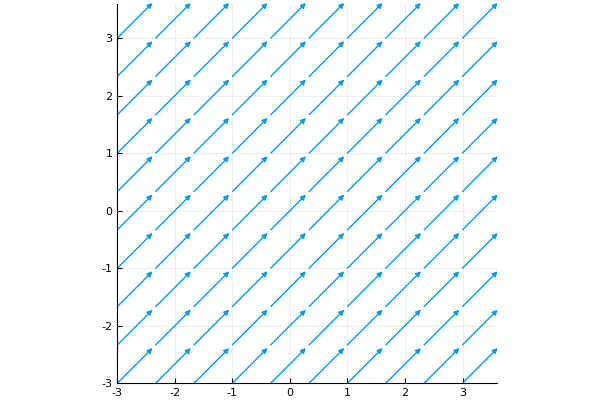

In [3]:
freestream = Freestream(rand(Complex128))
u = induce_velocity(Z, freestream, 0.0);
quiver(real.(Z)[:], imag.(Z)[:], quiver = (real.(u[:]), imag.(u[:])), ratio = 1)

This describes a **freestream**.

What about something like

$$
\phi(r, \theta) = \frac{S}{2\pi} \log(r) \, \uvec{e_r} \quad ?
$$

$$
\begin{align*}
u_r & = \ddp{\phi}{r} = \frac{S}{2\pi r} \,\uvec{e_r} \\
u_\theta & = \frac{1}{r}\ddp{\phi}{\theta} = 0
\end{align*}
$$


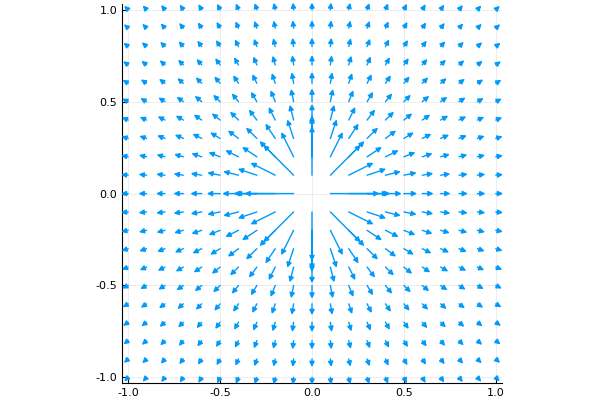

In [4]:
let z = [x + im*y for y in linspace(-1, 1, 21), x in linspace(-1, 1, 21)][:],
    source = Source.Point(0.0, 1);
    u = induce_velocity(z, source, 0.0);

    quiver(real.(z), imag.(z), quiver = 0.2.*(real.(u), imag.(u)), ratio = 1)
end

This is a **point source/sink**.

This looks very similar to the previous point source/sink example.
But taking the gradient of $\phi$, we find:

$$
\begin{align*}
u_r & = \ddp{\phi}{r} = 0 \\
u_\theta & = \frac{1}{r}\ddp{\phi}{\theta} = \frac{\Gamma}{2\pi r} \,\uvec{e_\theta}
\end{align*}
$$


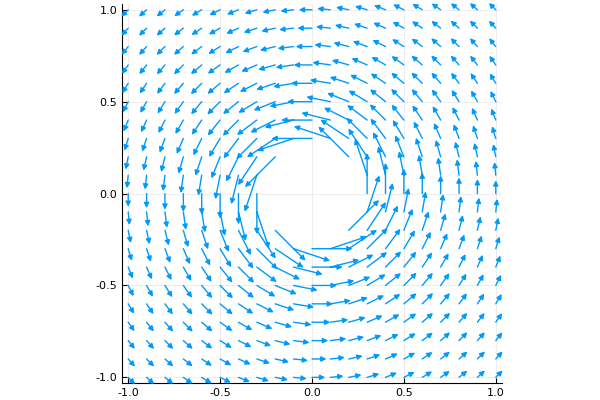

In [5]:
let z = [x + im*y for y in linspace(-1, 1, 21), x in linspace(-1, 1, 21)][:]    
    filter!(x -> abs(x) > 0.25, z)
    vortex = Vortex.Point(0.0, 2);
    u = induce_velocity(z, vortex, 0.0);
    quiver(real.(z), imag.(z), quiver = 0.2.*(real.(u), imag.(u)), ratio = 1)
end

This is a **point vortex**.

## Now what?

Consider two different velocity potentials, $\phi_1$ and $\phi_2$.
They each satisfy Laplace's equation, i.e.

$$
\lap{\phi_1} = \lap{\phi_2}  = 0.
$$

The linearity of the Laplacian means $\phi_1 + \phi_2$ is also satisfies:

$$
\lap{(\phi_1 + \phi_2)} = 0.
$$

So a velocity field derived from $\grad{(\phi_1 + \phi_2)}$ also gives a potential flow!

Let's combine a point sink and a point vortex!


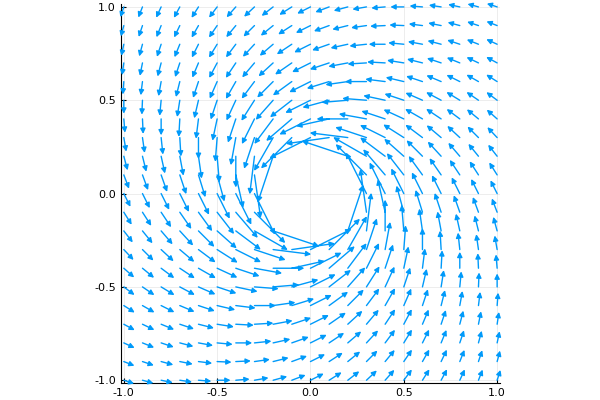

In [6]:
let z = [x + im*y for y in linspace(-1, 1, 21), x in linspace(-1, 1, 21)][:]    
    filter!(x -> abs(x) > 0.25, z)
    vortex = Vortex.Point(0.0, 2);
    source = Source.Point(0.0, -1);
    u = induce_velocity(z, (vortex, source), 0.0);
    quiver(real.(z), imag.(z), quiver = 0.2.*(real.(u), imag.(u)), ratio = 1)
end

What about a freestream with a point source?


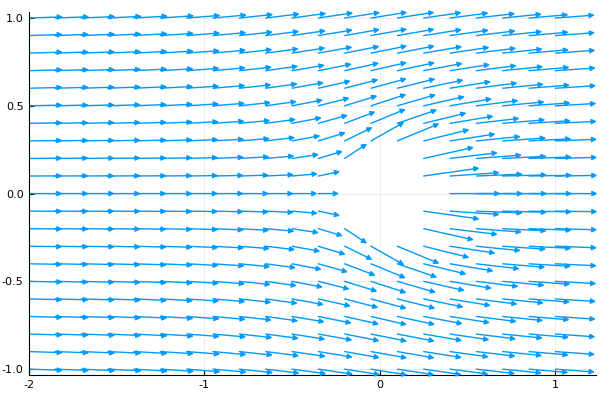

In [7]:
let z = [x + im*y for y in linspace(-1, 1, 21), x in linspace(-2, 1, 21)][:],
    freestream = Freestream(1.0),
    source = Source.Point(0.0, 1)
    
    filter!(x -> abs(x) > 0.25, z)
    u = induce_velocity(z, (freestream, source), 0.0)
    
    quiver(real.(z), imag.(z), quiver = 0.2.*(real.(u), imag.(u)), ratio = 1)
end

What about two point sources and two point vortices?


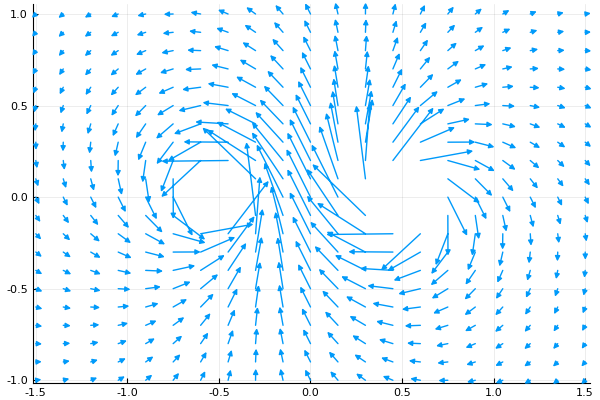

In [8]:
let z = [x + im*y for y in linspace(-1, 1, 21), x in linspace(-1.5, 1.5, 21)][:]    
    filter!(x -> (abs(x - 0.5) > 0.2) && (abs(x + 0.5) > 0.2), z)
    vortices = Vortex.Point.([-0.5, 0.5], [2, -2]);
    sources  = Source.Point.([-0.5, 0.5], [-1, 1]);
    u = induce_velocity(z, (vortices, sources), 0.0);
    quiver(real.(z), imag.(z), quiver = 0.2.*(real.(u), imag.(u)), ratio = 1)
end

We have seen that a velocity field derived from a velocity potential automatically satisfies the requirements for potential flow.
Before moving on, let's consider another approach.
Suppose the velocity field can be derived from a scalar **stream function**, $\psi$, through:

$$
\begin{align*}
u & = \ddp{\psi}{y} \\
v & = -\ddp{\psi}{x}
\end{align*}
$$

Then we see that the incompressibility condition is automatically satisfied:

$$
\div{\vec{u}} = \ddp{u}{x} + \ddp{v}{y} = \ddp{^2 \psi}{x\partial y} - \ddp{^2 \psi}{y\partial x} = 0
$$

In order to make the flow irrotational, we must then have

$$
\begin{align*}
\curl{\vec{u}} & = \uvec{k}\left(\ddp{v}{x} - \ddp{u}{y}\right) \\
& = \uvec{k}\left(-\ddp{^2 \psi}{x^2} - \ddp{^2\psi}{y^2}\right) = 0,
\end{align*}
$$

or equivilantly

$$
\lap{\psi} = 0.
$$

## Cool... why?

What properties does the stream function have that velocity potentials don't?

Consider:

$$
\vec{u} \cdot \grad{\psi}
$$

$$
\begin{align*}
\vec{u} \cdot \grad{\psi} & = 
\begin{bmatrix} u \\ v \end{bmatrix}
\cdot
\begin{bmatrix} \ddp{\psi}{x} \\ \ddp{\psi}{y} \end{bmatrix} \\
& = \begin{bmatrix} \ddp{\psi}{y} \\ -\ddp{\psi}{x} \end{bmatrix}
\cdot
\begin{bmatrix} \ddp{\psi}{x} \\ \ddp{\psi}{y} \end{bmatrix} \\
& = 0
\end{align*}
$$

This means that the gradient of the stream function is tangent to the local velocity.
So lines of constant $\psi$ must be streamlines!

For example, the contours of the stream function of a point vortex:


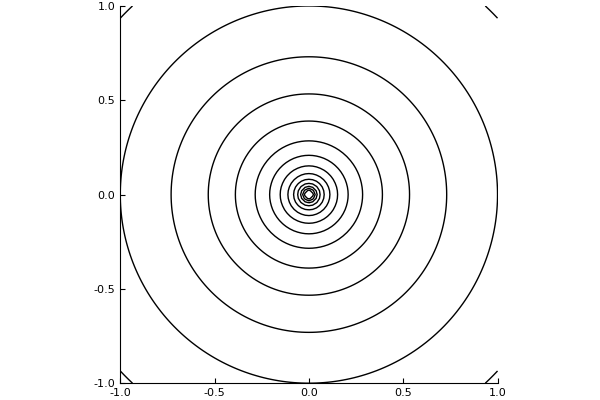

In [9]:
let X = Y = linspace(-1, 1, 101), z = [x + im*y for y in Y, x in X],
    vortex = Vortex.Point(0.0, 2),
    ψ = streamfunction(z, vortex)
    contour(X, Y, ψ, color = cgrad([:black, :black]), grid = false)
end

And for mulitple point vortices (with a freestream):


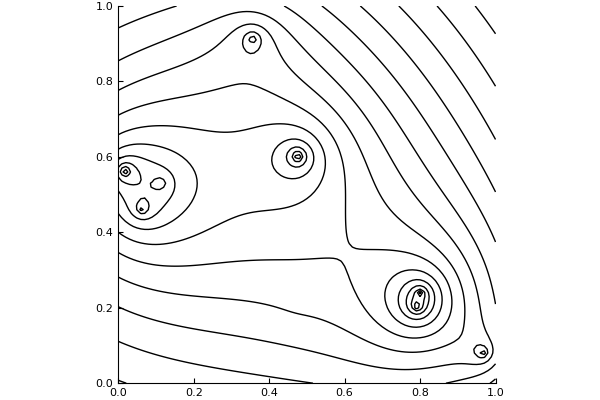

In [10]:
let X = Y = linspace(0, 1, 101), z = [x + im*y for y in Y, x in X],
    vortices = Vortex.Point.(rand(Complex128, 10), π*rand(10)),
    freestream = Freestream(rand(Complex128)),
    ψ = streamfunction(z, (vortices, freestream))
    contour(X, Y, ψ, color = cgrad([:black, :black]), grid = false, ratio = 1)
end

Before moving on:

- In an inviscid flow, we can only enforce the no-flow-through condition on a solid surface.
Since we cannot enforce no slip, is there a difference between a streamline and a fluid/structure interface?

## Flow over a cylinder

Given a freestream in the $x$-direction, we want to place potential flow elements to form a cylinder centered at the origin.


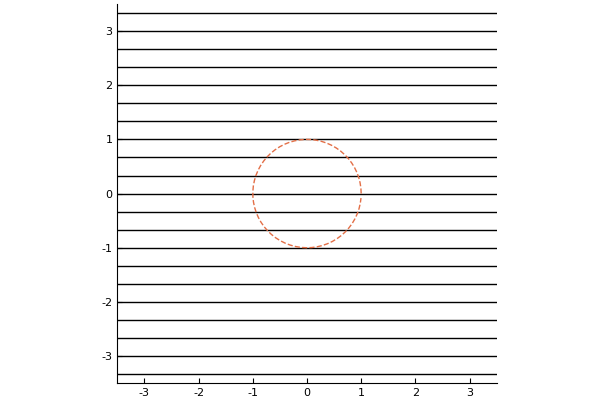

In [11]:
freestream = Freestream(1.0);
ψ_levels = collect(linspace(-5, 5, 31))
X = Y = linspace(-3.5, 3.5, 100)
streamlines(X, Y, freestream, levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)

Let's try to place a point vortex at the origin to redirect flow over/under the cylinder.

Interact.Options{:ToggleButtons,Any}(1: "input" = cw Any , "dir", :cw, "cw", 0, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("cw"=>:cw,"ccw"=>:ccw), Dict{Any,Any}(Pair{Any,Any}(:cw, "cw"),Pair{Any,Any}(:ccw, "ccw"))), Any[], Any[], true, "horizontal")


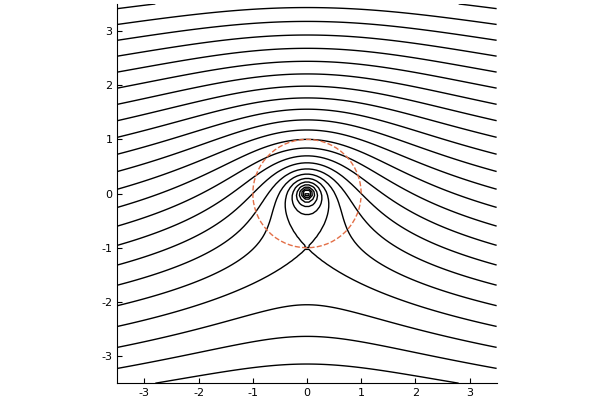

In [12]:
@manipulate for dir in [:cw, :ccw]
    point = Vortex.Point(0.0, dir == :cw ? -2π : 2π)
    streamlines(X, Y, ([point], freestream), levels = ψ_levels, color = streamline_colors)
    plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)
end

So we want a CW vortex above the origin and a CCW vortex below the origin:

Interact.Options{:SelectionSlider,Any}(5: "input-2" = 0.4444444444444444 Any , "Δy", 0.4444444444444444, "0.4444444444444444", 5, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1111111111111111"=>0.111111,"0.2222222222222222"=>0.222222,"0.3333333333333333"=>0.333333,"0.4444444444444444"=>0.444444,"0.5555555555555556"=>0.555556,"0.6666666666666666"=>0.666667,"0.7777777777777778"=>0.777778,"0.8888888888888888"=>0.888889,"1.0"=>1.0…), Dict{Any,Any}(Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.333333, "0.3333333333333333"),Pair{Any,Any}(0.555556, "0.5555555555555556"),Pair{Any,Any}(0.222222, "0.2222222222222222"),Pair{Any,Any}(0.666667, "0.6666666666666666"),Pair{Any,Any}(0.777778, "0.7777777777777778"),Pair{Any,Any}(0.444444, "0.4444444444444444"),Pair{Any,Any}(0.111111, "0.1111111111111111"),Pair{Any,Any}(0.888889, "0.8888888888888888"),Pair{Any,Any}(1.0, "1.0")…)), Any[], Any[], true, "horizontal")


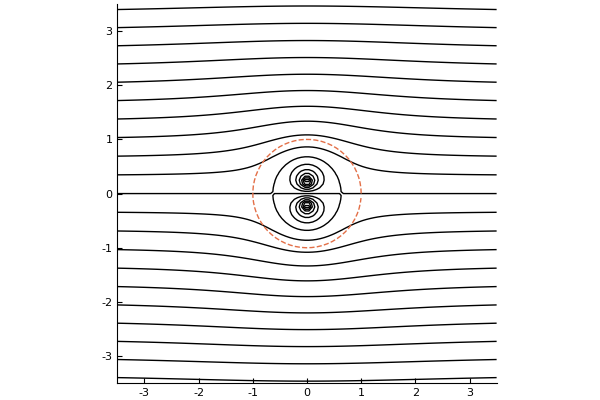

In [13]:
@manipulate for Δy in linspace(0, 1, 10)
point = Vortex.Point.(0.5Δy*[im, -im], [-2π, 2π])
streamlines(X, Y, (point, freestream), levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)
end

We see that as we move the vortices closer, the closed streamline becomese more circular.
However, its radius becomes smaller.

We can scale their circulations to be inversely proportional to their distance.
Taking the limit as their distance go to zero, we get a **doublet**.

Interact.Slider{Float64}(9: "input-3" = 1.0 Float64 , "", 1.0, 0.0:0.2222222222222222:2.0, "horizontal", true, ".3f", true)


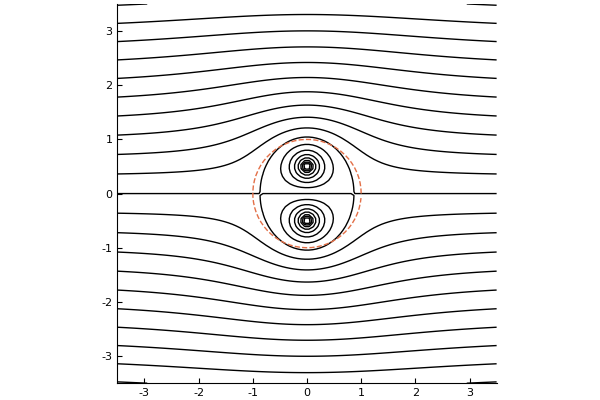

In [14]:
@manipulate for Δy = slider(linspace(0, 2, 10), value = 1.0)
points = Vortex.Point.(0.5Δy*[im, -im], [-2π, 2π]./Δy)
streamlines(X, Y, (points, freestream), levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)
end

So flow over a cylinder can be modeled as a freestream with a doublet:


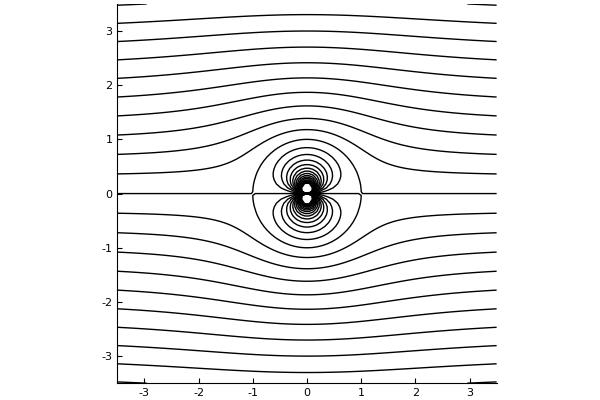

In [15]:
doublet = PotentialFlow.Doublets.Doublet(0.0im, π)
streamlines(X, Y, [freestream, doublet], levels = ψ_levels, color = streamline_colors)

## Method of Images

In the previous discussion, we talked about how we can create flow obstacles using source/vortex sheets.
Another way to deal with solid surfaces in potential flow is to take advantage of certain flow symmetries.

Consider two point vortices with opposite signed circulation placed across the $x$-axis.


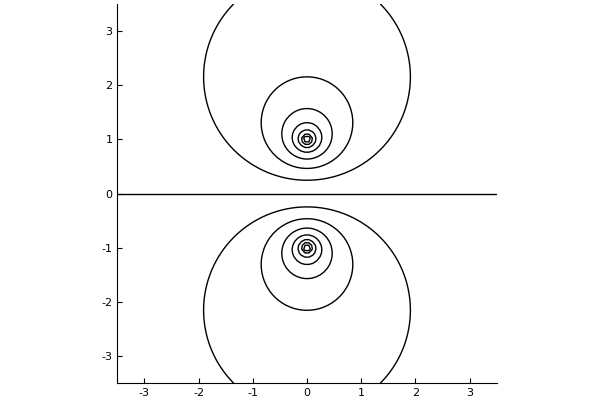

In [16]:
points = Vortex.Point.([im, -im], [1, -1])
streamlines(X, Y, points, color = streamline_colors)

Notice how the symmetry eliminates the vertical velocities along the $x$-axis.
If we treat the dividing streamline as a wall, then we can interpret the streamlines on the upper-half plane as the flow around a point vortex near a wall.  The vortex on the opposite side of the wall is called an **image**

## How would we set up a system of images to find the streamlines of a point vortex near a corner?

Interact.Options{:SelectionSlider,Any}(13: "input-4" = 0.0 Any , "Γ₂", 0.0, "0.0", 26, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-1.0"=>-1.0,"-0.96"=>-0.96,"-0.92"=>-0.92,"-0.88"=>-0.88,"-0.84"=>-0.84,"-0.8"=>-0.8,"-0.76"=>-0.76,"-0.72"=>-0.72,"-0.68"=>-0.68,"-0.64"=>-0.64…), Dict{Any,Any}(Pair{Any,Any}(-0.92, "-0.92"),Pair{Any,Any}(-0.28, "-0.28"),Pair{Any,Any}(-0.04, "-0.04"),Pair{Any,Any}(0.56, "0.56"),Pair{Any,Any}(-0.32, "-0.32"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(-0.68, "-0.68"),Pair{Any,Any}(-0.96, "-0.96"),Pair{Any,Any}(0.48, "0.48"),Pair{Any,Any}(-0.8, "-0.8")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(15: "input-5" = 0.0 Any , "Γ₃", 0.0, "0.0", 26, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-1.0"=>-1.0,"-0.96"=>-0.96,"-0.92"=>-0.92,"-0.88"=>-0.88,"-0.84"=>-0.84,"-0.8"=>-0.8,"-0.76"=>-0.76,"-0.72"=>-0.72,"-0.68"=>-0.68,"-0.64"=>-0.64…), Dict{Any,Any}(Pair{Any,Any}(-0.92, "-0.92"),Pair{Any,Any}(-0.28, "-0.28"),Pair{Any,Any}(-0.04, "-0.04"),Pair{Any,Any}(0.56, "0.56"),Pair{Any,Any}(-0.32, "-0.32"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(-0.68, "-0.68"),Pair{Any,Any}(-0.96, "-0.96"),Pair{Any,Any}(0.48, "0.48"),Pair{Any,Any}(-0.8, "-0.8")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(17: "input-6" = 0.0 Any , "Γ₄", 0.0, "0.0", 26, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-1.0"=>-1.0,"-0.96"=>-0.96,"-0.92"=>-0.92,"-0.88"=>-0.88,"-0.84"=>-0.84,"-0.8"=>-0.8,"-0.76"=>-0.76,"-0.72"=>-0.72,"-0.68"=>-0.68,"-0.64"=>-0.64…), Dict{Any,Any}(Pair{Any,Any}(-0.92, "-0.92"),Pair{Any,Any}(-0.28, "-0.28"),Pair{Any,Any}(-0.04, "-0.04"),Pair{Any,Any}(0.56, "0.56"),Pair{Any,Any}(-0.32, "-0.32"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(-0.68, "-0.68"),Pair{Any,Any}(-0.96, "-0.96"),Pair{Any,Any}(0.48, "0.48"),Pair{Any,Any}(-0.8, "-0.8")…)), Any[], Any[], true, "horizontal")


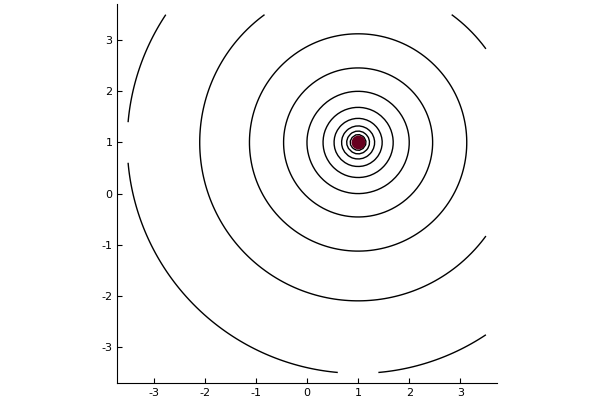

In [17]:
Γ₁ = 1.0
zs = [1 + im, -1 + im, -1 - im, 1 - im]
@manipulate for Γ₂ in linspace(-Γ₁, Γ₁, 51),
                Γ₃ in linspace(-Γ₁, Γ₁, 51),
                Γ₄ in linspace(-Γ₁, Γ₁, 51)
    points = Vortex.Point.(zs, [Γ₁, Γ₂, Γ₃, Γ₄])
    streamlines(X, Y, points, color = streamline_colors)
    plot!(points, markersize = 10, color = :RdBu)
end

Let's go back to the simple 2 point vortex case:


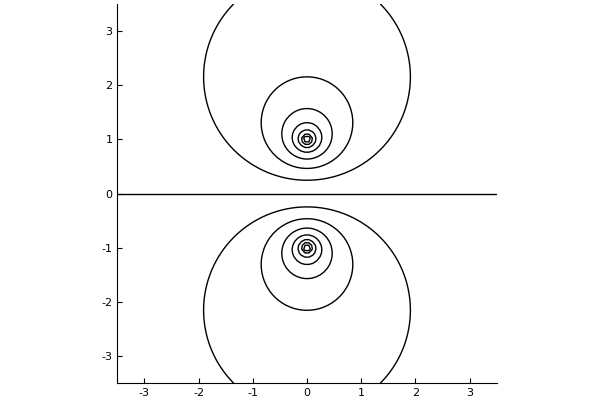

In [18]:
points = Vortex.Point.([im, -im], [1, -1])
streamlines(X, Y, points, color = streamline_colors)

Now let's move these pair of vortices so that we shift and rotate our wall


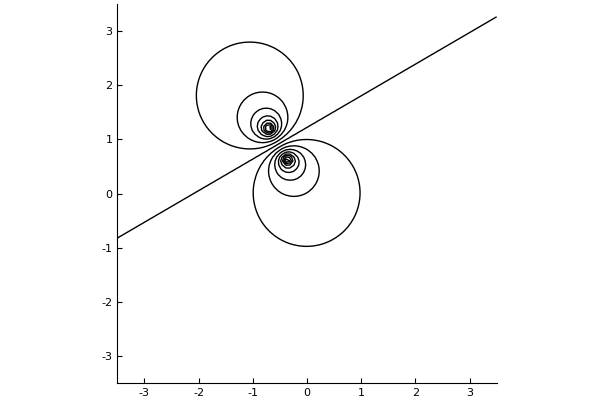

In [19]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
image = Vortex.Point(conj(1/point.z), -2π)
streamlines(X, Y, (point, image), levels = ψ_levels, color = streamline_colors)

Notice how the contours form closed circles:


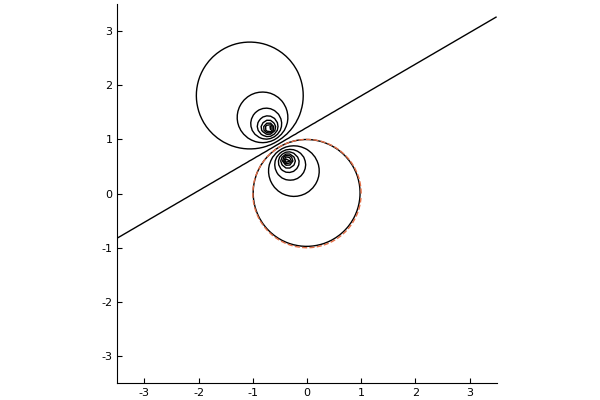

In [20]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
image = Vortex.Point(conj(1/point.z), -2π)
streamlines(X, Y, (point, image), levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)

Since these streamlines are just contours showing curves with equal streamfunction values, the marked cylinder can be preserved if we superimpose another potential flow field that also has the cylinder as a closed streamline.


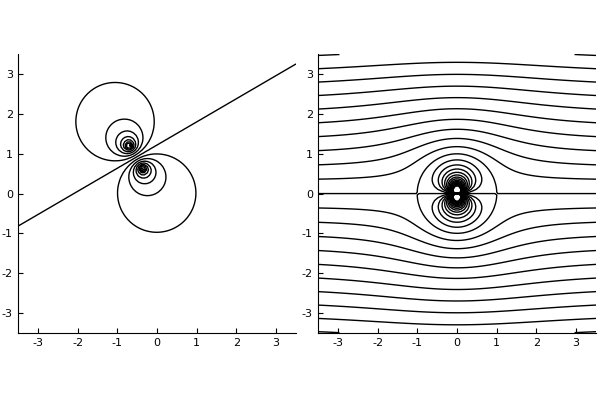

In [21]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
image = Vortex.Point(conj(1/point.z), -2π)
images = streamlines(X, Y, (point, image), levels = ψ_levels, color = streamline_colors)
cylinder = streamlines(X, Y, [freestream, doublet], levels = ψ_levels, color = streamline_colors)
plot(images, cylinder, layout = (1, 2))


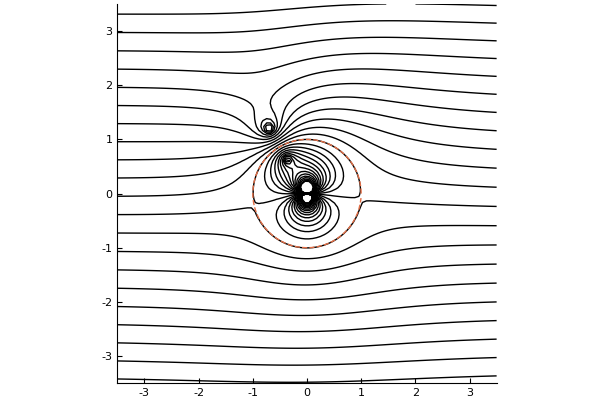

In [22]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
image = Vortex.Point(conj(1/point.z), -2π)
streamlines(X, Y, (freestream, PotentialFlow.Doublets.Doublet(0.0im, π), point, image), 
    levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)

Let's consider another approach to the same result.
Imagine if we had a perfectly good cylinder flow, made with a doublet and a freestream.
Then we deicde to put a vortex somewhere outside.


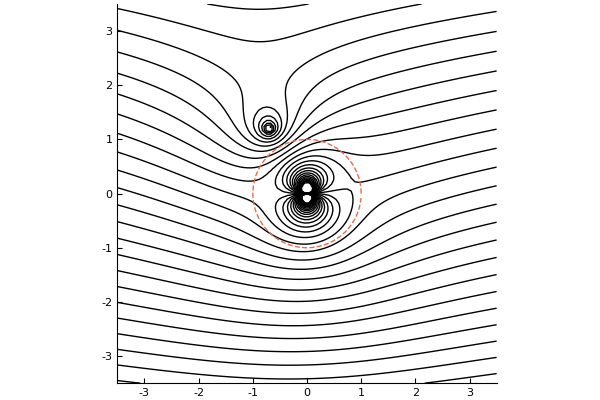

In [23]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
streamlines(X, Y, (freestream, PotentialFlow.Doublets.Doublet(0.0im, π), point), levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)

We now want to place an image vortex that would reform the wall of the cylinder:

Interact.Options{:SelectionSlider,Any}(21: "input-7" = 0.0 Any , "x", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-2.0"=>-2.0,"-1.8"=>-1.8,"-1.6"=>-1.6,"-1.4"=>-1.4,"-1.2"=>-1.2,"-1.0"=>-1.0,"-0.8"=>-0.8,"-0.6"=>-0.6,"-0.4"=>-0.4,"-0.2"=>-0.2…), Dict{Any,Any}(Pair{Any,Any}(1.0, "1.0"),Pair{Any,Any}(1.2, "1.2"),Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(-0.2, "-0.2"),Pair{Any,Any}(-1.0, "-1.0"),Pair{Any,Any}(-0.6, "-0.6"),Pair{Any,Any}(-1.6, "-1.6"),Pair{Any,Any}(1.4, "1.4"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(-1.2, "-1.2")…)), Any[], Any[], true, "horizontal")


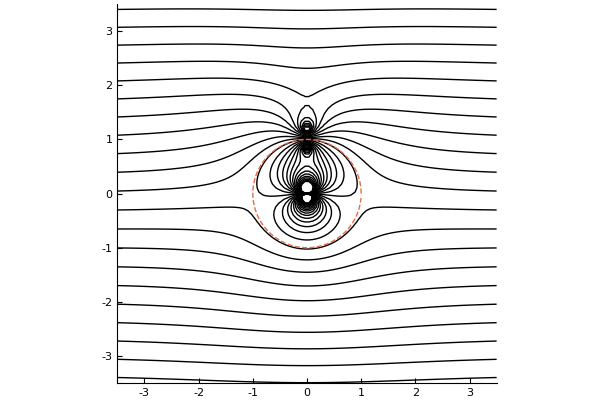

In [24]:
@manipulate for x in linspace(-2, 2, 21)
point = Vortex.Point(x + 1.2im, 10)
image = Vortex.Point(conj(1/point.z), -10)
streamlines(X, Y, (freestream, PotentialFlow.Doublets.Doublet(0.0im, π), point, image), levels = ψ_levels, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)
end

## Constructing more interesting obstacles

The code here is really only used to draw the pathlines.
It might be useful to [skip](#The-Rankine-Half-Body) this section, and come back to it later if you are curious.

In [25]:
"""
Given the source distribution and freestream, returns a 
function that computes the velocity of the tracer particles
"""
function make_state_equation(sources, U∞)
    # Here, `x` is a vector containing the current positions
    # of the tracer particles, and `ẋ` is vector that that
    # their velocities will be written into.  The `t` variable
    # stands for the current time.
    function (ẋ, x, t)
        fill!(ẋ, U∞)
        induce_velocity!(ẋ, x, sources, t)
    end
end

"""
Given the current location and velocity of the tracers,
compute their location after a small time step
"""
function update_x!(x₊, x₋, ẋ, Δt)
    @. x₊ = x₋ + ẋ*Δt
end

update_x!

We will then use a 4th-order Runge-Kutta scheme to simulate the trajectories of the tracers.

In [26]:
function trace_pathlines(sources, U∞, start_pos, T)
    states = [copy(start_pos) for i in 1:length(T)+1]
    ẋs = [allocate_velocity(start_pos) for i in 1:4]
    
    compute_ẋ! = make_state_equation(sources, U∞)

    for (i, t) in enumerate(T)
        rk4!(states[i+1], states[i], t, step(T), compute_ẋ!, update_x!, ẋs)
    end
    
    transpose(hcat(states...))
end

trace_pathlines (generic function with 1 method)

In [27]:
"""
Compute the component of `w` in the `n̂` direction
"""
component(n̂, w) = real(conj(n̂)*w)

component

### The Rankine Half Body

Let's start with a simple freestream in the $x$-direction with velocity $U_\infty$, and a point source at the origin.
What should the strength of this point source be in order to make $(-1, 0)$ a stagnation point?

Recall that the velocity field induced by a point source at $\vec{x}_s$ with strength $S$ is given by:

$$
    \vec{u}_S(\vec{x})
  = \frac{S}{2\pi}
    \frac{\vec{x} - \vec{x}_s}
         {\abs{\vec{x} - \vec{x}_s}}.
$$

We want the velocity induced by the freestream and the point vortex to be zero at $(-1, 0)$, i.e.

$$
\begin{bmatrix}U_\infty \\ 0\end{bmatrix} + \vec{u}_s\left(\begin{bmatrix}-1 \\ 0\end{bmatrix}\right) = 0
$$

Since $\vec{x}_s = \begin{bmatrix} 0 & 0 \end{bmatrix}^T$, we have

$$
U_\infty - \frac{S}{2\pi} = 0,
$$

which give us $S = 2\pi U_\infty$.
Let's see what that looks like.

We first set the freestream velocity and create a single point source:

In [28]:
U∞ = 1.0
source = Source.Point(0, 2π*U∞)

Source.Point(0.0 + 0.0im, 6.283185307179586)

We will seed 30 tracer particles along the $x=-3$ line, spanning $y \in [-3, 3]$, and track their trajectory over 20 convective times:

In [29]:
tracer_start = -3.0 .+ linspace(-3,3,30)*im;
T = 0:1e-2:20

freestream = trace_pathlines((), U∞, tracer_start, T)
freestream_with_source = trace_pathlines(source, U∞, tracer_start, T);

which looks like:


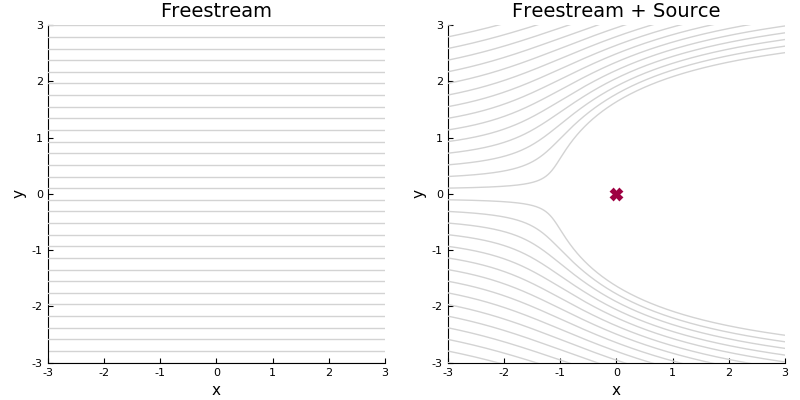

In [30]:
plt = plot(layout = 2, size = (800, 400))
plot!(plt[1], freestream, color = colorant"lightgray", xlabel = "x", ylabel = "y",
      xlim = (-3, 3), ylim = (-3, 3), title = "Freestream", grid = false)
plot!(plt[2], freestream_with_source, color = colorant"lightgray", xlabel = "x", ylabel = "y",
      xlim = (-3, 3), ylim = (-3, 3), title = "Freestream + Source")
plot!(plt[2], [source], markersize = 10, grid = false)

What would have happened if the point source was placed off the $y$-axis?
We will then have

$$
\begin{align*}
U_\infty - \frac{S}{2\pi} & = 0 \\
\frac{S}{2\pi} \frac{y}{1 + y^2} & = 0.
\end{align*}
$$

This means that we cannot zero out the horizontal velocity without imparting a vertical velocity.
So instead of a stagnation point, we have a point that stops flow in only one direction.
That's not really useful on its own, but in the next section we will see how we can use whole bunch of point sources to stop flow from going through a whole bunch places.

### A whole bunch of point sources

As we mentioned before, the only role of a solid surface in an invisicd fluid is to prevent the fluid from going through it.
We can accomplish the same thing by replacing the surface with a **source sheet**.

We haven't covered source sheets yet, but you can think of it as a source where the strength is distributed along a curve instead of being concentrated at a single point.
Since we will be discretizing the sheet into small segments, and represent those segments as point sources anyways, you can temporarily forget what I said about the sheets and just think of it as a lot of point sources.

Let's start by considering flow past a equilateral triangle.
We will discretize this triangle into small segments, each with length $\Delta s$.

In [31]:
Δs = 0.1
s = -(1 - Δs):Δs:(1 - Δs)

bottom = Source.Point.(s, 1.0);
right  = Source.Point.((s + 1).*exp(im*2π/3) + 1, 1.0);
left   = Source.Point.((s .+ 1)*exp(-im*2π/3) + im*√3, 1.0);

sources = vcat(bottom, right, left)
targets = Elements.position.(sources);

n̂ = vcat(
    fill(-1.0im, length(bottom)),
    fill(exp(im*π/6), length(right)),
    fill(exp(im*5π/6), length(left)));

Δs = fill(Δs, length(n̂));

This will look something like:


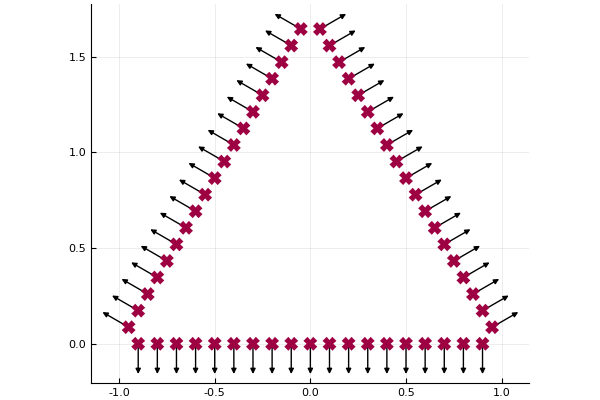

In [32]:
plot(sources, ratio = 1)
quiver!(real.(targets), imag.(targets), quiver = 0.15.*(real.(n̂), imag.(n̂)), color = :black)
plot!(sources, markersize = 10)

So the velocity at any point in the fluid is equal to the freestream plus the velocity induced by each of the $N$ point sources:

$$
\vec{u}(\vec{x}) = \vec{U}_\infty + \sum_{n = 1}^N \vec{u}_n(\vec{x})
$$

If we want enforce the no-flow-through condition at the point sources, then we must have

$$
\sum_{n = 1}^N \uvec{n}_i \cdot \vec{u}_n(\vec{x}_i) = - \uvec{n}_i \cdot \vec{U}_\infty \qquad \text{for } i = 1, 2, \cdots, N.
$$

As long as the we are not evaluating the velocity that a segment induces on itself, we will treat the segment as a point source:

$$
    \vec{u}_n(\vec{x})
  = S_n \cdot \underbrace{\frac{1}{2\pi}
    \frac{\vec{x} - \vec{x}_n}
         {\abs{\vec{x} - \vec{x}_n}}}_{\uvec{u}_n(\vec{x})} \qquad \text{when } \vec{x} \neq \vec{x}_n
$$

But how **would** we evaluate $\vec{u}_n(\vec{x}_n)$?  We probably won't go over it in class, so you'll just have to believe ([or not](#/5/1)) that it somehow is:

$$
\vec{u}_n(\vec{x}_n) = \frac{S_n}{\Delta s}
$$

<a id="back"></a>

So the no-flow-through condition above can be written in matrix form:

$$
\underbrace{
\begin{bmatrix}
1/\Delta s & \uvec{n}_1 \cdot \frac{1}{2\pi}\frac{\vec{x}_1 - \vec{x}_2}{\abs{\vec{x}_1 - \vec{x}_2}^2}
& \cdots & \uvec{n}_1 \cdot \frac{1}{2\pi}\frac{\vec{x}_1 - \vec{x}_N}{\abs{\vec{x}_1 - \vec{x}_N}^2}
\\
\uvec{n}_2 \cdot \frac{1}{2\pi}\frac{\vec{x}_2 - \vec{x}_1}{\abs{\vec{x}_2 - \vec{x}_1}^2} & 1/\Delta s
& & \vdots
\\
\vdots & & \ddots & \vdots \\
\uvec{n}_N \cdot \frac{1}{2\pi}\frac{\vec{x}_N - \vec{x}_1}{\abs{\vec{x}_N - \vec{x}_1}^2} &
\cdots & \cdots &
1 / \Delta s
\end{bmatrix}}_{A}
\begin{bmatrix}
S_1 \\
S_2 \\
\vdots \\
\vdots \\
S_n
\end{bmatrix} =
\underbrace{ -
\begin{bmatrix}
\uvec{n}_1 \cdot \vec{U}_\infty \\
\uvec{n}_2 \cdot \vec{U}_\infty \\
\vdots \\
\vdots \\
\uvec{n}_N \cdot \vec{U}_\infty \\
\end{bmatrix}}_{b},
$$

which we can solve to find the strengths of the point sources.
In code, this will look something like:

In [33]:
b = -component.(n̂, U∞);

A = [component(n, induce_velocity(target, source, 0)) for (n, target) in zip(n̂, targets), source in sources]
A .+= 0.5*diagm(1./Δs);

S = A \ b;


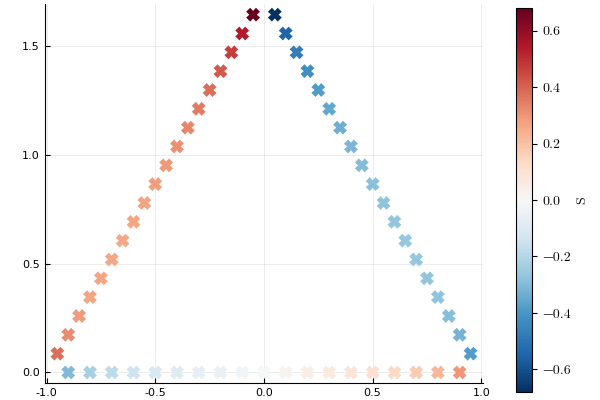

In [34]:
sources = Source.Point.(targets, S)

plot(sources, color = :RdBu_r, colorbar = :right, markersize = 10, colorbar_title = "S")

Now, we will seed a line of tracer particles along $x = -3$ and advect them in time to trace out pathlines:


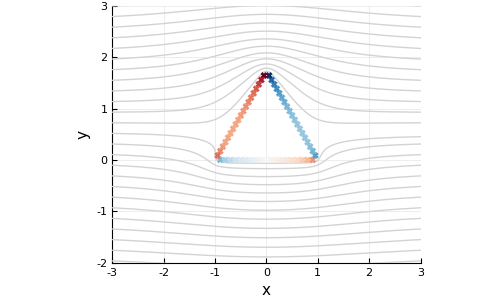

In [35]:
tracers = trace_pathlines(sources, U∞, tracer_start, T)

plot(tracers, color = colorant"lightgray", xlabel = "x", ylabel = "y",
     xlim = (-3, 3), ylim = (-2, 3), size = (500, 300))
plot!(sources, markersize = 5, color = :RdBu_r)

## Some questions to consider

- Did the sources *have* to be on the surface of the body?
- Can we achieve the same result with $N$ point sources placed *inside* the body?
- Why not place the sources outside the body?
- What if we used point vortices instead?
- What would happen if we tried to plot the contours of the stream function of these point sources?

In [36]:
# we'll wrap all of this into a function so we don't have to keep repeating ourselves.
function simulate_flow(sources, Δs, n̂, U∞; tracer_start = -3.0 .+ linspace(-3,3,30)*im, T = 0:1e-2:20)
    b = -component.(n̂, U∞);

    A = [component(n, induce_velocity(target, source, 0)) for (n, target) in zip(n̂, targets), source in sources]
    A .+= 0.5*diagm(1./Δs);

    S = A \ b;
    
    sources = Source.Point.(targets, S)
    
    tracers = trace_pathlines(sources, U∞, tracer_start, T)

    plt = plot(tracers, color = colorant"lightgray", xlabel = "x", ylabel = "y",
               xlim = (-3, 3), ylim = (-3, 3), size = (600, 400))
    plot!(plt, sources, markersize = 2, color = :RdBu_r)
    
    plt, sources, tracers
end

simulate_flow (generic function with 1 method)

### Flow Past a Cylinder (Again)

Instead of using a doublet, let's try to construct a cylinder using a collection of point sources

As in the previous example, we first construct the surface of the body:

In [37]:
θ = linspace(0, 2π, 101)[1:end-1]
Δs = fill(step(θ), length(θ))
sources = Source.Point.(exp.(im.*θ), 1.0);
targets = Elements.position.(sources)
n̂ = Elements.position.(sources);


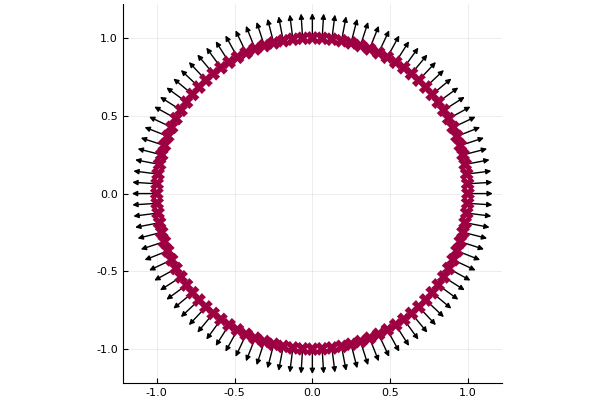

In [38]:
plot(sources, ratio = 1)
quiver!(real.(targets), imag.(targets), quiver = 0.15.*(real.(n̂), imag.(n̂)), color = :black)
plot!(sources, markersize = 10)

Now with a freestream from left to right, we have;


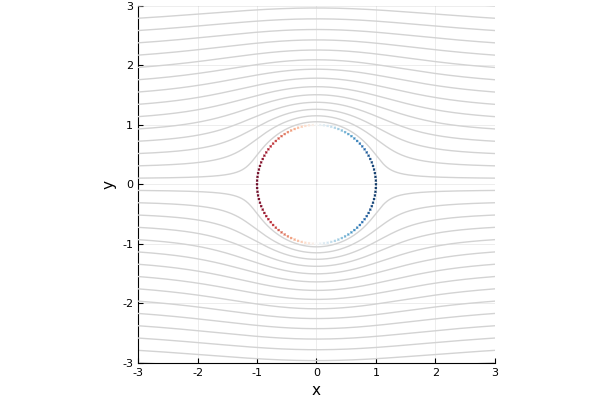

In [39]:
plt, actual_sources, tracers = simulate_flow(sources, Δs, n̂, 1.0)
plt

Now with a downward freestream, this becomes:


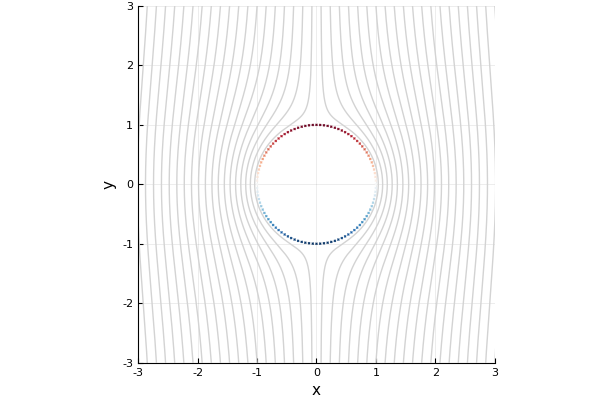

In [40]:
plt, actual_sources, tracers = simulate_flow(sources, Δs, n̂, -im, tracer_start = linspace(-3,3,40) .+ 3im)
plt

### Flow Past a Happy Face

In [41]:
θ = linspace(π/6, 5π/6, 100)
Δs = step(θ)
targets = exp.(-im*θ)
n̂ = targets;
targets = vcat(targets, flipdim((1 - Δs)*targets, 1))
n̂ = vcat(n̂, -flipdim(n̂, 1))
n̂[1] *= im
n̂[50] *= -im

Δs = abs.(gradient(targets))

θᵢ = linspace(0, 2π, 30)[1:end-1]
left_eye = 0.1exp.(im*θᵢ) - 0.5 + 0.2im
right_eye = 0.1exp.(im*θᵢ) + 0.5 + 0.2im;

append!(targets, left_eye)
append!(targets, right_eye)
append!(Δs, fill(0.5π/length(θᵢ), 2length(θᵢ)))
append!(n̂, exp.(im*θᵢ))
append!(n̂, exp.(im*θᵢ))

sources = Source.Point.(targets, 1.0);


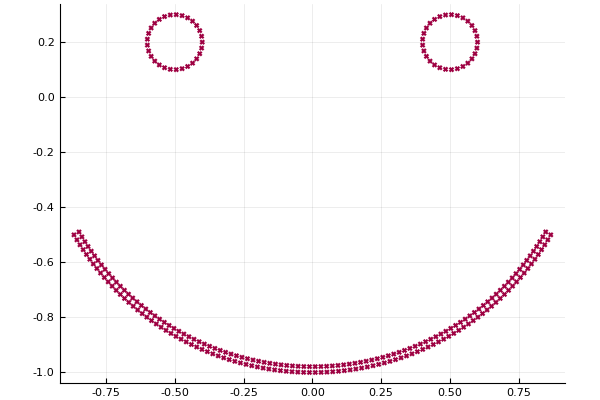

In [42]:
plot(sources, ratio = 1)

With $U_\infty$ going downward:


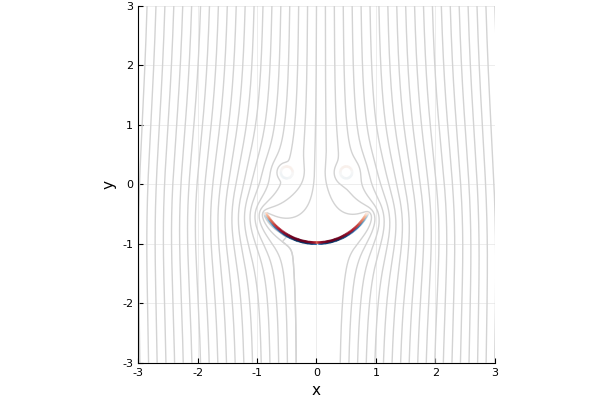

In [43]:
plt, actual_sources, tracers = simulate_flow(sources, Δs, n̂, -1.0im, tracer_start = linspace(-3,3,41) .+ 3im)
plt

With $U_\infty$ going from left to right:


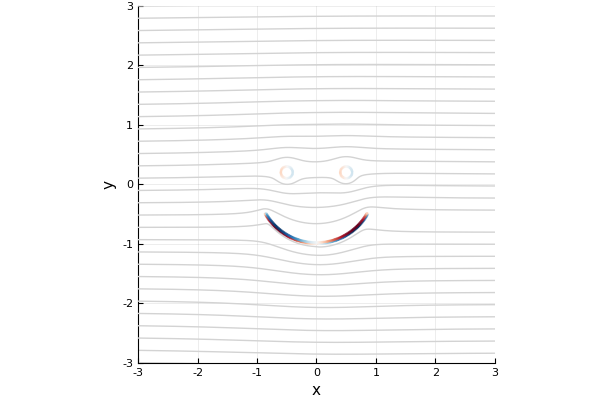

In [44]:
plt, actual_sources, tracers = simulate_flow(sources, Δs, n̂, 1.0)
plt

## Appendix

### Or Not

We'll have to discuss source sheets for a little bit here to find out the velocity that the sheet induces on itself.
To keep it simple, we will use a straight sheet segment with length $\Delta s$ centered around the origin.
The equation describing this sheet segment is given by:

$$
\vec{u}_s(\vec{x}) = \frac{1}{2\pi}
\int_{-\Delta s/2}^{\Delta s/2}
\sigma(l) \frac{\vec{x} - \vec{x}_s(l)}
{\abs{\vec{x} - \vec{x}_s(l)}}
\d{l},
$$

where $\sigma$ is the local strength of the sheet.
This is not all that different from the point sources, except when you approach the sheet.

We first assume that $\Delta s$ is small enough that $\sigma$ is essentially constant in the interval.
Then, if we parametrize the target point as

$$
\vec{x} = r\cos\theta\,\uvec{i} + r\sin\theta\,\uvec{j},
$$

we obtain

$$
\begin{align*}
\vec{u}_s(\vec{x})
& = \frac{\sigma(0)}{2\pi}
\left[ \uvec{i}
\int_{-\Delta s/2}^{\Delta s/2}
\frac{(r\cos\theta - l)}
{\abs{\vec{x} - \vec{x}_s(l)}}
\d{l} + \uvec{j}
\int_{-\Delta s/2}^{\Delta s/2}
\frac{r\cos\theta}
{\abs{\vec{x} - \vec{x}_s(l)}}
\d{l}
\right] \\
& =-\frac{\sigma(0)}{2\pi}
\left( \frac{\uvec{i}}{2}
\log\left[ (r\cos\theta - l)^2 + (r\sin\theta)^2
\right]_{-\Delta s/2}^{\Delta s/2} + \left. \uvec{j}
\tan^{-1 }\left(\frac{r\cos\theta - l}
{r\sin\theta}
\right)
\right|_{-\Delta s/2}^{\Delta s/2}
\right)
\end{align*}
$$

As $\vec{x}$ approaches the origin, $r$ goes to zero

$$
\lim_{r \rightarrow 0}
\vec{u}_s(\vec{x}) = \mathrm{sign}(\theta)\frac{\sigma(0)}{2}.
$$

Since we are using point sources to model a segment of a source sheet, its strength $S$ is distributed along the segment, i.e.

$$
S = \int_{-\Delta s/2}^{\Delta s/2} \sigma(l) \d{l}.
$$

For a short sheet segment, we assume that $\sigma$ is essentially constant along the segment, so we have $\sigma \approx \frac{S}{\Delta s}$, which finally gives us

\begin{equation}
\lim_{r \rightarrow 0} \uvec{u}_s(\vec{x}) = \frac{S}{2\Delta s}
\end{equation}

You can go [back](#/4/11) now.